In [72]:
from google.colab import drive
import gspread
import pandas as pd
from google.colab import auth
from google.auth import default
import pickle
import numpy as np
import matplotlib.pyplot as plt
import os
import seaborn as sns
from statsmodels.stats.proportion import proportions_ztest
from scipy.stats import mannwhitneyu

In [73]:
def load_data(sheet_url, tab_name, tini_amp_values, tend_amp_values, tend_values):
    # Authenticate and create the client
    auth.authenticate_user()
    creds, _ = default()
    gc = gspread.authorize(creds)

    # Open the worksheet by URL and get the specific tab by name
    sh = gc.open_by_url(sheet_url)
    worksheet = sh.worksheet(tab_name)  # Ensure tab name is correct

    # Get all the data from the sheet
    data = worksheet.get_all_values()

    # Convert to DataFrame
    headers = data[0]  # Assumes the first row is headers
    df = pd.DataFrame(data[1:], columns=headers)

    # Assuming there is a 'Replicate' column with values 'EXP1', 'EXP2', 'EXP3'
    # Create a mapping of replicate type to tini_amp, tend_amp, and tend values
    replicate_map = {
        'exp1': (tini_amp_values[0], tend_amp_values[0], tend_values[0]),
        'exp2': (tini_amp_values[1], tend_amp_values[1], tend_values[1])
    }

    # Add new columns 'tini_amp', 'tend_amp', and 'tend' based on the replicate type
    df['tini_amp'] = df['Replicate'].apply(lambda x: replicate_map[x.lower()][0] if x.lower() in replicate_map else None)
    df['tend_amp'] = df['Replicate'].apply(lambda x: replicate_map[x.lower()][1] if x.lower() in replicate_map else None)
    df['tend'] = df['Replicate'].apply(lambda x: replicate_map[x.lower()][2] if x.lower() in replicate_map else None)

    # Return the dataframe
    return df

# Example usage

expeID='vip_Amp'

drive.mount('/content/drive')
tab_name = "vip_Amp_traps"  # Replace with the actual tab name

# tini_amp and tend_amp values, as well as the final tend values for exp_1, exp_2, exp_3
tini_amp_values = [36, 42]     # Corresponding to exp_1, exp_2
tend_amp_values = [53, 59]    # Corresponding to exp_1, exp_2
tend_values = [144, 107]     # Corresponding to exp_1, exp_2, exp_3

# Load the data with the new columns
df = load_data(sheet_url, tab_name, tini_amp_values, tend_amp_values, tend_values)
print(df)


    Index Experiment Replicate Position   Trap CellType Status  tini_amp  \
0       1    vip_Amp      EXP1     xy01  trap2      VIP   Dead      36.0   
1       2    vip_Amp      EXP1     xy01  trap3      CFP   Dead      36.0   
2       3    vip_Amp      EXP1     xy03  trap3      CFP   Dead      36.0   
3       4    vip_Amp      EXP1     xy04  trap1      CFP   Dead      36.0   
4       5    vip_Amp      EXP1     xy05  trap1      CFP   Dead      36.0   
..    ...        ...       ...      ...    ...      ...    ...       ...   
187   190    vip_Amp               xy30  trap3                       NaN   
188   191    vip_Amp               xy07  trap1                       NaN   
189   192    vip_Amp               xy43  trap2                       NaN   
190   193    vip_Amp               xy15  trap8                       NaN   
191   194    vip_Amp               xy28  trap3                       NaN   

     tend_amp   tend  
0        53.0  144.0  
1        53.0  144.0  
2        53.0  144

In [74]:


# Find all PKL files in the directory
pkl_files = [os.path.join(base_path, f) for f in os.listdir(base_path) if f.endswith('.pkl')]

# Find all TIF files in the directory
tif_files = [os.path.join(img_path, f) for f in os.listdir(img_path) if f.endswith('.tif')]

# Print the found PKL files
print("Found PKL files:", pkl_files)


frames2min=5
pixel2um=11

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Found PKL files: ['/content/drive/MyDrive/SYNC_Projects/VIP205/MotherMachine/AMP_MontagesPKL/vip_Amp_EXP1_xy14_trap2_DIC.pkl', '/content/drive/MyDrive/SYNC_Projects/VIP205/MotherMachine/AMP_MontagesPKL/vip_Amp_EXP1_xy11_trap2_DIC.pkl', '/content/drive/MyDrive/SYNC_Projects/VIP205/MotherMachine/AMP_MontagesPKL/vip_Amp_EXP1_xy43_trap1_DIC.pkl', '/content/drive/MyDrive/SYNC_Projects/VIP205/MotherMachine/AMP_MontagesPKL/vip_Amp_EXP1_xy04_trap1_CFP.pkl', '/content/drive/MyDrive/SYNC_Projects/VIP205/MotherMachine/AMP_MontagesPKL/vip_Amp_EXP1_xy41_trap3_DIC.pkl', '/content/drive/MyDrive/SYNC_Projects/VIP205/MotherMachine/AMP_MontagesPKL/vip_Amp_EXP1_xy43_trap3_CFP.pkl', '/content/drive/MyDrive/SYNC_Projects/VIP205/MotherMachine/AMP_MontagesPKL/vip_Amp_EXP1_xy03_trap5_CFP.pkl', '/content/drive/MyDrive/SYNC_Projects/VIP205/MotherMachine/AMP_MontagesPKL/vip_Amp_EXP1_xy

In [75]:
print(tif_files)

['/content/drive/MyDrive/SYNC_Projects/VIP205/MotherMachine/AMP_MontagesTIF/vip_Amp_EXP1_xy01_trap1_DIC.tif', '/content/drive/MyDrive/SYNC_Projects/VIP205/MotherMachine/AMP_MontagesTIF/vip_Amp_EXP1_xy01_trap2_DIC.tif', '/content/drive/MyDrive/SYNC_Projects/VIP205/MotherMachine/AMP_MontagesTIF/vip_Amp_EXP1_xy01_trap3_DIC.tif', '/content/drive/MyDrive/SYNC_Projects/VIP205/MotherMachine/AMP_MontagesTIF/vip_Amp_EXP1_xy03_trap3_DIC.tif', '/content/drive/MyDrive/SYNC_Projects/VIP205/MotherMachine/AMP_MontagesTIF/vip_Amp_EXP1_xy03_trap4_DIC.tif', '/content/drive/MyDrive/SYNC_Projects/VIP205/MotherMachine/AMP_MontagesTIF/vip_Amp_EXP1_xy03_trap5_DIC.tif', '/content/drive/MyDrive/SYNC_Projects/VIP205/MotherMachine/AMP_MontagesTIF/vip_Amp_EXP1_xy04_trap1_DIC.tif', '/content/drive/MyDrive/SYNC_Projects/VIP205/MotherMachine/AMP_MontagesTIF/vip_Amp_EXP1_xy04_trap3_DIC.tif', '/content/drive/MyDrive/SYNC_Projects/VIP205/MotherMachine/AMP_MontagesTIF/vip_Amp_EXP1_xy05_trap1_DIC.tif', '/content/drive/My

In [76]:

def extract_file_identifier(file_path):
    base_name = os.path.basename(file_path)
    name_without_extension = os.path.splitext(base_name)[0]
    parts = name_without_extension.split('_')
    identifier = '_'.join(parts[2:5])
    return identifier

def get_identifiers_by_cell_type(all_data, df, cell_type_filter):
    identifiers = []

    for file in all_data.keys():
        identifier = extract_file_identifier(file)
        cell_type = get_cell_type(df, identifier)
        if cell_type == cell_type_filter:
            identifiers.append(identifier)

    return identifiers

def get_cell_type(df, position):
    # Since position is directly passed, filter the DataFrame by position
    filtered_df = df[df['Position'] == position]

    # Return the CellType if found, otherwise return None
    if not filtered_df.empty:
        return filtered_df['CellType'].values[0]
    else:
        print(f"Warning: No cell type found for position {position}")
        return None



def get_time_series_data(all_data, identifier):
    for file, data in all_data.items():
        if extract_file_identifier(file) == identifier:
            for trap_data in data:
                if trap_data['id'] in {1, 2}:
                    frames = list(range(len(trap_data['y_breakpoints'])))
                    cell_lengths = trap_data['y_breakpoints']
                    return frames, cell_lengths
    return [], []


In [77]:

# Function to match .pkl files with .tif files
def match_pkl_tif(pkl_files, tif_files):
    matched_files = []
    for pkl_file in pkl_files:
        pkl_identifier = extract_file_identifier(pkl_file)
        for tif_file in tif_files:
            tif_identifier = extract_file_identifier(tif_file)
            if pkl_identifier == tif_identifier:
                matched_files.append((pkl_file, tif_file))
                break
    return matched_files

# Function to load a PKL file
def load_pkl(file_path):
    with open(file_path, 'rb') as f:
        data = pickle.load(f)
    return data


matched_files = match_pkl_tif(pkl_files, tif_files)

# Load each PKL file
all_data = {}
for pkl_file, _ in matched_files:
    data = load_pkl(pkl_file)
    all_data[pkl_file] = data


In [78]:
def plot_tracking(time_series_data, division_events, image_path, tini_amp, tend_amp, tend):
    frames, cell_lengths = time_series_data
    identifier = extract_file_identifier(image_path)

    if len(frames) > 0:
        _, _, cell_divisions = division_events

        # Compute the derivative of cell lengths
        cell_lengths = np.array(cell_lengths)
        derivatives = np.diff(cell_lengths) / np.diff(frames)
        derivative_frames = frames[1:]

        # Load the image
        image = plt.imread(image_path)

        # Create subplots
        fig, (ax0, ax1, ax2) = plt.subplots(3, 1, figsize=(6, 10))

        # Plot the image
        ax0.imshow(image, cmap='gray')
        ax0.axis('off')
        ax0.set_title(identifier)

        # Define a buffer (5% of the data range) to avoid tight x-axis limits
        frame_min = min(frames)
        frame_max = max(frames)
        x_buffer = (frame_max - frame_min) * 0.05  # 5% buffer

        # Plot the time series with division events
        ax1.plot(frames, cell_lengths, color='black', label='Cell Length')
        ax1.scatter([frames[i] for i in range(len(cell_divisions)) if cell_divisions[i]],
                    [cell_lengths[i] for i in range(len(cell_divisions)) if cell_divisions[i]],
                    color='#ADD8E6', label='Division Event')
        ax1.set_ylabel('Cell Length (pixels)')
        ax1.legend()

        # Annotate tini_amp, tend_amp, and tend with vertical lines
        ax1.axvline(tini_amp-0.1, color='green', linestyle='--', label='tini_amp')
        ax1.axvline(tend_amp, color='blue', linestyle='--', label='tend_amp')
        ax1.axvline(tend+0.1, color='purple', linestyle='--', label='tend')

        # Adjust x-axis limits with padding
        ax1.set_xlim([frame_min - x_buffer, frame_max + x_buffer])

        # Plot the derivative of cell lengths
        ax2.plot(derivative_frames, derivatives, color='blue', label='Derivative of Cell Length')
        ax2.scatter([frames[i] for i in range(len(cell_divisions)) if cell_divisions[i]],
                    [derivatives[i] for i in range(len(cell_divisions)) if cell_divisions[i]],
                    color='#ADD8E6', label='Division Event')

        # Annotate tini_amp, tend_amp, and tend with vertical lines in the derivative plot
        ax2.axvline(tini_amp-0.1, color='green', linestyle='--', label='tini_amp')
        ax2.axvline(tend_amp, color='blue', linestyle='--', label='tend_amp')
        ax2.axvline(tend+0.1, color='purple', linestyle='--', label='tend')

        # Adjust x-axis limits with padding
        ax2.set_xlim([frame_min - x_buffer, frame_max + x_buffer])

        ax2.set_xlabel('Time (frames)')
        ax2.set_ylabel('Derivative of Cell Length (pixels/frame)')
        plt.tight_layout()

        plt.show()
    else:
        print("Not plotted: %s " % image_path)

In [79]:
def get_time_series_of_cell_lengths(all_data, df, identifier):
    x2frame = 11  # Define the constant for conversion
    trap_lengths = {}

    for file, data in all_data.items():
        if extract_file_identifier(file) == identifier:
            for trap_data in data:
                trap_id = trap_data['id']

                # Only consider traps with id=1 and id=2
                if trap_id not in {1, 2}:
                    continue

                x_breakpoints = trap_data['x_breakpoints']
                y_breakpoints = trap_data['y_breakpoints']

                frames = [x / x2frame for x in x_breakpoints]

                # Ensure both x_breakpoints and y_breakpoints have the same length
                min_length = min(len(x_breakpoints), len(y_breakpoints))
                x_breakpoints = x_breakpoints[:min_length]
                y_breakpoints = y_breakpoints[:min_length]

                # Only process if there is data to process
                if x_breakpoints and y_breakpoints:
                    if trap_id not in trap_lengths:
                        trap_lengths[trap_id] = []
                    trap_lengths[trap_id].append(y_breakpoints)

            if 1 in trap_lengths and 2 in trap_lengths:
                lengths_1 = trap_lengths[1][0]
                lengths_2 = trap_lengths[2][0]
                cell_lengths = [abs(l1 - l2) for l1, l2 in zip(lengths_1, lengths_2)]

                # Sort the frames and cell_lengths
                sorted_indices = np.argsort(frames[:len(cell_lengths)])
                sorted_frames = np.array(frames[:len(cell_lengths)])[sorted_indices]
                sorted_cell_lengths = np.array(cell_lengths)[sorted_indices]

                return sorted_frames.tolist(), sorted_cell_lengths.tolist()

    return [], []




In [114]:
import re

def extract_position_and_trap(identifier):
    """Extracts both the position (e.g., 'xy09') and trap (e.g., 'trap12') from the file identifier."""
    position_match = re.search(r'(xy\d+)', identifier)
    trap_match = re.search(r'(trap\d+)', identifier)

    position = position_match.group(1) if position_match else None
    trap = trap_match.group(1) if trap_match else None

    return position, trap

def get_cell_type(df, position, trap):
    """Fetches the CellType for the given position and trap."""
    filtered_df = df[(df['Position'] == position) & (df['Trap'] == trap)]

    if not filtered_df.empty:
        cell_type = filtered_df['CellType'].values[0]  # Take the first match
        return cell_type
    else:
        #print(f"Warning: No cell type found for position {position} and trap {trap}")
        return None

def get_identifiers_by_cell_type(all_data, df, cell_type_filter):
    """Get identifiers that match the specified cell type."""
    identifiers = []
    for file in all_data.keys():
        identifier = extract_file_identifier(file)

        # Extract both position and trap
        position, trap = extract_position_and_trap(identifier)

        # Now pass both position and trap to get_cell_type
        cell_type = get_cell_type(df, position, trap)
        if cell_type == cell_type_filter:
            identifiers.append(identifier)

    return identifiers


def analyze_division_events(time_series_data, replicate, position, trap, df_status):
    """
    Classifies a cell as 'Alive' or 'Dead' based on the Status column in Google Sheets.

    Parameters:
    - time_series_data: Tuple (frames, cell_lengths)
    - experiment_id, replicate, position, trap: Identifiers for lookup in df_status
    - df_status: DataFrame with preloaded Status column from Google Sheets

    Returns:
    - frames, cell_lengths, cell_divisions (as before)
    - survived: Boolean (True if Alive, False if Dead)
    """
    frames, cell_lengths = time_series_data

    # Look up the status in the dataframe
    matching_row = df_status[
        (df_status['Replicate'] == replicate) &
        (df_status['Position'] == position) &
        (df_status['Trap'] == trap)
    ]

    if not matching_row.empty:
        status = matching_row.iloc[0]['Status']
        #print(f"Status for {replicate}, {position}, {trap}: {status}")
        survived = status.strip().lower() == 'alive'  # Ensure case insensitivity
    else:
        print(f"Warning: No status found for {replicate}, {position}, {trap}")
        survived = None  # Unknown status

    cell_divisions = [False] * len(cell_lengths)

    # Compute the derivative of cell lengths
    derivatives = np.diff(cell_lengths) / np.diff(frames)
    derivative_frames = frames[1:]

    threshold = -5

    # Identify local minimums in the derivative that are below the threshold
    for i in range(1, len(derivatives) - 1):
        if derivatives[i] < threshold and derivatives[i] < derivatives[i - 1] and derivatives[i] < derivatives[i + 1]:
            cell_divisions[i + 1] = True  # Mark the division in cell_divisions



    return frames, cell_lengths, cell_divisions, survived

def update_df_with_survival_status_and_plot(all_data, df, cell_type_filter=None):
    """Updates df with survival status based on whether a cell divided after tend_amp and generates plots."""
    # Ensure the DataFrame has the column `is_alive`
    if 'is_alive' not in df.columns:
        df['is_alive'] = None  # Initialize the column

    identifiers = get_identifiers_by_cell_type(all_data, df, cell_type_filter)

    # First pass: find global min and max frames
    global_min_frame = float('inf')
    global_max_frame = float('-inf')

    # First loop: determine global x-limits
    for identifier in identifiers:
        # Extract the correct position and trap from the identifier
        #position, trap = extract_position_and_trap(identifier)

        parts = identifier.split('_')  # Expected format: 'EXP1_xy04_trap1'
        replicate = parts[0]  # First element -> 'EXP1'
        position = parts[1]   # Second element -> 'xy04'
        trap = parts[2]       # Third element -> 'trap1'

        if position is None or trap is None:
            print(f"Warning: Could not extract position or trap from identifier {identifier}, skipping...")
            continue

        # Analyze division events for this identifier
        time_series_data = get_time_series_of_cell_lengths(all_data, df, identifier)
        if time_series_data[0]:  # Only analyze if there is data
            # Retrieve tend_amp for this specific identifier
            filtered_df = df[(df['Position'] == position) & (df['Trap'] == trap)]
            if not filtered_df.empty:
                tend_amp = filtered_df['tend_amp'].values[0]
            else:
                print(f"Warning: No tend_amp found for identifier {identifier}, skipping...")
                continue

            print("*****")
            frames, cell_lengths, cell_divisions, survived = analyze_division_events(time_series_data, replicate, position, trap, df)

            # Update global min and max frames
            global_min_frame = min(global_min_frame, min(frames))
            global_max_frame = max(global_max_frame, max(frames))

    # Second pass: plot with the determined global x-limits
    total_cells_with_divisions = 0
    cells_with_divisions_after_tend_amp = 0

    for identifier in identifiers:
        # Extract the correct position and trap from the identifier
        #position, trap = extract_position_and_trap(identifier)

        parts = identifier.split('_')  # Expected format: 'EXP1_xy04_trap1'
        replicate = parts[0]  # First element -> 'EXP1'
        position = parts[1]   # Second element -> 'xy04'
        trap = parts[2]       # Third element -> 'trap1'

        if position is None or trap is None:
            print(f"Warning: Could not extract position or trap from identifier {identifier}, skipping...")
            continue

        # Filter based on cell type if specified
        if cell_type_filter is not None:
            cell_type = get_cell_type(df, position, trap)
            if cell_type_filter != cell_type:
                continue

        # Filter the DataFrame for the correct position and trap
        filtered_df = df[(df['Position'] == position) & (df['Trap'] == trap)]
        if filtered_df.empty:
            print(f"Warning: No data found for position {position} and trap {trap}, skipping...")
            continue

        # Retrieve tend_amp for this specific identifier
        tend_amp = filtered_df['tend_amp'].values[0]

        # Analyze division events for this identifier
        time_series_data = get_time_series_of_cell_lengths(all_data, df, identifier)
        if time_series_data[0]:  # Only analyze if there is data
            frames, cell_lengths, cell_divisions, survived = analyze_division_events(time_series_data, replicate, position, trap, df)

            if any(cell_divisions):  # Check if there are any division events
                total_cells_with_divisions += 1
                if survived:
                    cells_with_divisions_after_tend_amp += 1

                # Update the 'is_alive' status in the DataFrame for this position and trap
                df.loc[(df['Position'] == position) & (df['Trap'] == trap), 'is_alive'] = survived

            # Generate the plot with survival status and global x-limits
            plot_cell_lengths(time_series_data, (frames, cell_lengths, cell_divisions, survived), identifier,
                              tini_amp=filtered_df['tini_amp'].values[0],
                              tend_amp=filtered_df['tend_amp'].values[0],
                              tend=filtered_df['tend'].values[0],
                              global_min_frame=global_min_frame, global_max_frame=global_max_frame)

    if total_cells_with_divisions == 0:
        survival_rate = 0.0  # Avoid division by zero
    else:
        survival_rate = cells_with_divisions_after_tend_amp / total_cells_with_divisions

    return survival_rate, df  # Return the updated DataFrame as well


def plot_cell_lengths(time_series_data, division_events, image_path, tini_amp, tend_amp, tend, global_min_frame, global_max_frame):
    frames, cell_lengths = time_series_data
    frames = np.array(frames) - tini_amp  # Shift frames by tini_amp

    # Extract experiment and trap from the file identifier (assuming it's in the format 'EXPX_xyYY_trapZZ')
    identifier = extract_file_identifier(image_path)
    exp, trap = extract_position_and_trap(identifier)

    if len(frames) > 0:
        _, _, cell_divisions, survived = division_events

        # Set the survival status and line color based on survival
        survival_status = "Survived" if survived else "Not Survived"
        line_color = 'blue' if survived else 'red'

        # Create subplots
        fig, ax0 = plt.subplots(1, 1, figsize=(8, 4))

        # Plot the time series with division events
        ax0.plot(frames, cell_lengths, color=line_color, label=f'Cell Length ({survival_status})')
        ax0.scatter([frames[i] for i in range(len(cell_divisions)) if cell_divisions[i]],
                    [cell_lengths[i] for i in range(len(cell_divisions)) if cell_divisions[i]],
                    color='red', label='Division Event')
        ax0.set_ylabel('Cell Length (pixels)')
        #ax0.legend()

        # Annotate tini_amp, tend_amp, and tend with vertical lines
        ax0.axvline(0, color='green', linestyle='--', label='tini_amp')  # Now at 0
        ax0.axvline(tend_amp - tini_amp, color='blue', linestyle='--', label='tend_amp')  # Shifted
        ax0.axvline(tend - tini_amp, color='purple', linestyle='--', label='tend')  # Shifted

        # Annotate the interval between tini_amp and tend_amp with a red box (starts at 0)
        ax0.axvspan(0, tend_amp - tini_amp, color='red', alpha=0.3, label='Cadmium Exposure')

        # Use global x-limits
        ax0.set_xlim([global_min_frame, global_max_frame])

        # Set title including experiment, trap, and survival status
        ax0.set_title(f"{image_path}: {survival_status}")

        plt.tight_layout()
        plt.show()
    else:
        print(f"Not plotted: {image_path}")

In [81]:
def get_breakpoints(all_data, identifier):
    """
    Extracts x_breakpoints and y_breakpoints for all traps from the given data.

    Parameters:
    - all_data (dict): Dictionary containing the data for each file.
    - identifier (str): Identifier to filter the relevant file.

    Returns:
    - dict: A dictionary containing x_breakpoints and y_breakpoints for all traps.
    """
    breakpoints = {}

    for file, data in all_data.items():
        if extract_file_identifier(file) == identifier:
            for trap_data in data:
                trap_id = trap_data['id']

                x_breakpoints = trap_data.get('x_breakpoints', [])
                y_breakpoints = trap_data.get('y_breakpoints', [])

                # Ensure both x_breakpoints and y_breakpoints have the same length
                min_length = min(len(x_breakpoints), len(y_breakpoints))
                x_breakpoints = x_breakpoints[:min_length]
                y_breakpoints = y_breakpoints[:min_length]

                if trap_id not in breakpoints:
                    breakpoints[trap_id] = {'x_breakpoints': [], 'y_breakpoints': []}

                breakpoints[trap_id]['x_breakpoints'].extend(x_breakpoints)
                breakpoints[trap_id]['y_breakpoints'].extend(y_breakpoints)

    return breakpoints


In [82]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import numpy as np
import tifffile as tiff

def create_image_with_breakpoints_plot(tif_file, breakpoints, tini_amp, t_end_amp, channel_width=11):
    try:
        # Load the image from the .tif file
        tif_image = tiff.imread(tif_file)

        # Flip the image vertically
        tif_image = np.flipud(tif_image)

        # Calculate the maximum x_breakpoint
        max_x = max(
            max(trap_data.get('x_breakpoints', [])) for trap_data in breakpoints.values()
        )

        # Create the figure and axis
        fig, ax = plt.subplots(figsize=(8, 8))
        ax.imshow(tif_image, cmap='gray')

        # Overlay horizontal lines for each breakpoint
        for trap_id, trap_data in breakpoints.items():
            x_breakpoints = trap_data.get('x_breakpoints', [])
            y_breakpoints = trap_data.get('y_breakpoints', [])

            for x, y in zip(x_breakpoints, y_breakpoints):
                ax.hlines(y, x, x + channel_width, colors='yellow', linestyles='-', linewidth=2)

        # Add the red rectangle to annotate the interval
        rect = patches.Rectangle(
            (tini_amp, 0),  # Bottom-left corner of the rectangle
            t_end_amp - tini_amp,  # Width of the rectangle
            tif_image.shape[0],  # Height of the rectangle (full image height)
            linewidth=2,
            edgecolor='#ADD8E6',
            facecolor='#ADD8E6'
        )
        ax.add_patch(rect)

        # Adjust x-axis limits
        ax.set_xlim(0, max_x)
        ax.axis('off')  # Hide axes for better visualization
        ax.set_title(f"{tif_file.split('/')[-1]}")

        plt.close(fig)

        return fig, ax

    except Exception as e:
        print(f"Error displaying the image or plotting breakpoints: {e}")
        return None, None


In [83]:
def create_cell_lengths_plot(time_series_data, division_events, image_path, tini_amp, tend_amp, tend, global_min_frame, global_max_frame):
    """
    Creates a plot of cell lengths with division events.

    Parameters:
    - time_series_data (tuple): Time-series data (frames, cell_lengths).
    - division_events (tuple): Division events and survival status.
    - image_path (str): Path to the image file (for title extraction).
    - tini_amp, tend_amp, tend (float): Time markers for cadmium exposure and recovery.
    - global_min_frame, global_max_frame (float): Global frame boundaries.

    Returns:
    - fig, ax: Matplotlib figure and axes objects for the cell lengths plot.
    """
    frames, cell_lengths = time_series_data
    frames = np.array(frames) - tini_amp  # Shift frames by tini_amp

    if len(frames) > 0:
        _, _, cell_divisions, survived = division_events

        # Set the survival status and line color based on survival
        survival_status = "Survived" if survived else "Not Survived"
        line_color = 'blue' if survived else 'grey'

        # Create the figure and axis
        fig, ax = plt.subplots(figsize=(6, 2))

        # Plot the time series with division events
        ax.plot(frames, cell_lengths, color=line_color, label=f'Cell Length ({survival_status})')
        ax.scatter([frames[i] for i in range(len(cell_divisions)) if cell_divisions[i]],
                   [cell_lengths[i] for i in range(len(cell_divisions)) if cell_divisions[i]],
                   color='#ADD8E6', label='Division Event')
        ax.set_ylabel('Cell Length (pixels)')
        ax.legend()

        # Annotate tini_amp, tend_amp, and tend with vertical lines
        ax.axvline(0, color='grey', linestyle='--', label='tini_amp')  # Now at 0
        ax.axvline(tend_amp - tini_amp, color='grey', linestyle='--', label='tend_amp')  # Shifted
        ax.axvline(tend - tini_amp, color='grey', linestyle='--', label='tend')  # Shifted

        # Annotate the interval between tini_amp and tend_amp with a red box (starts at 0)
        ax.axvspan(0, tend_amp - tini_amp, color='#ADD8E6', alpha=0.3, label='Cadmium Exposure')

        # Use global x-limits
        ax.set_xlim([global_min_frame, global_max_frame])

        # Set title including experiment, trap, and survival status
        ax.set_title(f"Time Series: {survival_status}")


        plt.close(fig)
        return fig, ax
    else:
        print(f"No data to plot for: {image_path}")
        return None, None


In [84]:
def plot_image_and_cell_lengths(
    tif_file,
    this_breakpoints,
    time_series_data,
    division_events,
    tini_amp,
    tend_amp,
    tend,
    global_min_frame,
    global_max_frame,
    channel_width=11,
    base_path=None,
    image_path=None,
    frames2min=5,
    pixel2um=1 / 11,  # Corrected for pixels-to-micrometers conversion
):
    """
    Combines and displays the image with breakpoints and the cell lengths plot,
    scaling axes for time (minutes) and cell length (micrometers).
    """
    # Create the individual plots (do not show them)
    fig_img, ax_img = create_image_with_breakpoints_plot(
        tif_file, this_breakpoints, tini_amp, tend_amp, channel_width=channel_width
    )
    fig_plot, ax_plot = create_cell_lengths_plot(
        time_series_data, division_events, tif_file, tini_amp, tend_amp, tend, global_min_frame, global_max_frame
    )

    # Combine the two plots vertically
    if fig_img and fig_plot:
        combined_fig = plt.figure(figsize=(8, 4))
        gs = combined_fig.add_gridspec(2, 1, height_ratios=[4, 2])

        # Add the image with breakpoints
        combined_ax_img = combined_fig.add_subplot(gs[0])
        combined_ax_img.imshow(ax_img.images[0].get_array(), cmap="gray")
        combined_ax_img.set_xlim(ax_img.get_xlim())
        combined_ax_img.set_ylim(ax_img.get_ylim())
        combined_ax_img.axis("off")
        combined_ax_img.set_title(ax_img.get_title())

        # Overlay breakpoints on the combined image
        for trap_id, trap_data in this_breakpoints.items():
            x_breakpoints = [x for x in trap_data.get("x_breakpoints", [])]
            y_breakpoints = trap_data.get("y_breakpoints", [])
            for x, y in zip(x_breakpoints, y_breakpoints):
                combined_ax_img.hlines(
                    y, x, x + channel_width, colors="blue", linestyles="-", linewidth=1
                )

        # Add the red rectangle to annotate the interval
        rect = patches.Rectangle(
            (tini_amp * channel_width, 0),  # Bottom-left corner of the rectangle
            (tend_amp - tini_amp) * channel_width,  # Width of the rectangle
            ax_img.get_ylim()[1],  # Height of the rectangle (image height)
            linewidth=2,
            edgecolor="#ADD8E6",
            facecolor="none",
        )
        combined_ax_img.add_patch(rect)

        # Add the cell lengths plot
        combined_ax_plot = combined_fig.add_subplot(gs[1])
        # Scale x-axis and y-axis data
        scaled_x = ax_plot.lines[0].get_xdata() * frames2min
        scaled_y = ax_plot.lines[0].get_ydata() * pixel2um

        # Plot scaled data
        combined_ax_plot.plot(
            scaled_x, scaled_y, color="blue", label="Cell length"
        )
        combined_ax_plot.scatter(
            ax_plot.collections[0].get_offsets()[:, 0] * frames2min,
            ax_plot.collections[0].get_offsets()[:, 1] * pixel2um,
            color="#ADD8E6", label="Division Event",
        )
        max_frame=global_max_frame * frames2min
        #max_frame=480

        combined_ax_plot.set_xlim(
            global_min_frame * frames2min, max_frame
        )
        combined_ax_plot.set_ylim(0, max(scaled_y) * 1.1)
        combined_ax_plot.set_xlabel("Time (minutes)")
        combined_ax_plot.set_ylabel(r"Length ($\mu$m)")

        # Set xticks at intervals of 60 minutes
        xticks = np.arange(global_min_frame * frames2min, global_max_frame * frames2min , 60)
        combined_ax_plot.set_xticks(xticks)

        # Add vertical lines and shaded region (scale x-axis)
        combined_ax_plot.axvline(0, color="#ADD8E6", linestyle="-")
        combined_ax_plot.axvline(
            (tend_amp - tini_amp) * frames2min, color="#ADD8E6", linestyle="-"
        )
        combined_ax_plot.axvline(
            (tend - tini_amp) * frames2min, color="grey", linestyle="-"
        )
        combined_ax_plot.axvspan(
            0,
            (tend_amp - tini_amp) * frames2min,
            color="#ADD8E6",
            alpha=0.3
        )
        combined_ax_plot.legend(fontsize=8, loc="upper right")

        plt.tight_layout()

        # Define the file name and save as PDF in the base path
        fig_name = os.path.basename(image_path).replace(".tif", ".pdf")
        fig_path = os.path.join(base_path, fig_name)
        plt.savefig(fig_path)  # Save as PDF
        print("Exporting %s" % fig_path)

        plt.show()
    else:
        print("Could not create one or both plots.")


([0.0, 2.0, 4.0, 6.0, 8.0, 10.0, 12.0, 14.0, 16.0, 18.0, 20.0, 22.0, 24.0, 26.0, 28.0, 30.0, 32.0, 34.0, 36.0, 38.0, 40.0, 42.0, 44.0, 46.0, 48.0, 50.0, 52.0, 54.0, 56.0, 58.0, 60.0, 62.0, 64.0, 66.0, 68.0, 70.0, 72.0, 74.0, 76.0, 78.0, 80.0, 82.0, 84.0, 86.0, 88.0, 90.0, 92.0, 94.0, 96.0, 98.0, 100.0, 102.0], [43, 54, 26, 28, 32, 35, 47, 57, 62, 35, 30, 54, 61, 35, 45, 55, 65, 75, 80, 93, 45, 64, 82, 100, 118, 47, 51, 55, 58, 62, 65, 74, 87, 100, 59, 72, 84, 96, 108, 121, 133, 145, 157, 169, 192, 226, 461, 241, 251, 261, 272, 282], [False, False, True, False, False, False, False, False, False, True, False, False, False, True, False, False, False, False, False, False, True, False, False, False, False, True, False, False, False, False, False, False, False, False, True, False, False, False, False, False, False, False, False, False, False, False, False, True, False, False, False, False], False)
Exporting /content/drive/MyDrive/SYNC_Projects/VIP205/MotherMachine/figures/vip_Amp_EXP1_xy04_t

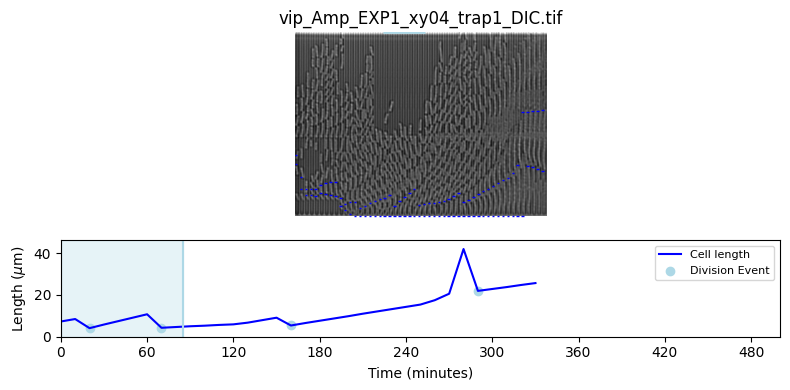

PKL files with no division events: []


In [85]:
import os

# Define the base path where the files will be stored
base_path = '/content/drive/MyDrive/SYNC_Projects/VIP205/MotherMachine/figures/'

# Create the directory if it doesn't exist
if not os.path.exists(base_path):
    os.makedirs(base_path)


# Example usage

x2frame = 11

cmap = plt.get_cmap("viridis")  # Use the viridis colormap

files_to_plot=[( '/content/drive/MyDrive/SYNC_Projects/VIP205/MotherMachine/AMP_MontagesPKL/vip_Amp_EXP1_xy04_trap1_DIC.pkl', '/content/drive/MyDrive/SYNC_Projects/VIP205/MotherMachine/AMP_MontagesTIF/vip_Amp_EXP1_xy04_trap1_DIC.tif')]
#files_to_plot = matched_files #All files
num_files_to_plot = len(files_to_plot)

# List to store PKL files with no division events
no_division_files = []

# Initialize global min and max frames
if num_files_to_plot>1:
    global_min_frame = float('inf')
    global_max_frame = float('-inf')

    # First pass: Find global min and max frames across all files
    for pkl_file, tif_file in files_to_plot:
        identifier = extract_file_identifier(pkl_file)
        time_series_data = get_time_series_of_cell_lengths(all_data, df, identifier)


        if time_series_data[0]:  # Only consider if there is data
            frames = time_series_data[0]  # Extract frames from time_series_data
            global_min_frame = -40  # min(global_min_frame, min(frames))
            global_max_frame = max(global_max_frame, max(frames))
else:
  global_min_frame=0
  global_max_frame=100

# Second pass: Generate plots with global x-limits
for pkl_file, tif_file in files_to_plot:
    identifier = extract_file_identifier(pkl_file)
    time_series_data = get_time_series_of_cell_lengths(all_data, df, identifier)

    # Split the identifier
    parts = identifier.split('_')  # Expected format: 'EXP1_xy04_trap1'
    replicate = parts[0]  # First element -> 'EXP1'
    position = parts[1]   # Second element -> 'xy04'
    trap = parts[2]       # Third element -> 'trap1'

    # Extract tini_amp, tend_amp, and tend from the DataFrame for this identifier
    filtered_df = df[(df['Replicate'] == replicate) &
                     (df['Position'] == position) &
                     (df['Trap'] == trap)]

    if not filtered_df.empty:
        tini_amp = float(filtered_df['tini_amp'].values[0])
        tend_amp = float(filtered_df['tend_amp'].values[0])
        tend = float(filtered_df['tend'].values[0])
    else:
        tini_amp, tend_amp, tend = None, None, None

    # Call analyze_division_events using metadata and Google Sheets data
    division_events = analyze_division_events(time_series_data, replicate, position, trap, df)
    print(division_events)

    # Check if there are no division events
    if not any(division_events[2]):
        no_division_files.append(pkl_file)


    this_breakpoints=get_breakpoints(all_data, identifier)

    #show_image_with_breakpoints(tif_file, this_breakpoints, x2frame)

    #plot_cell_lengths(time_series_data, division_events, tif_file, tini_amp, tend_amp, tend, global_min_frame, global_max_frame)

    plot_image_and_cell_lengths(
        tif_file,
        this_breakpoints,
        time_series_data,
        division_events,
        tini_amp,
        tend_amp,
        tend,
        global_min_frame,
        global_max_frame,
        channel_width=x2frame,
        base_path=base_path,
        image_path=tif_file
    )

# Print or store the list of PKL files with no division events
print("PKL files with no division events:", no_division_files)


In [86]:
#CIP205# Remove files with no division events from matched_files and all_data
no_division_files_removed = []  # List to store the files being removed

matched_files = [(pkl_file, tif_file) for pkl_file, tif_file in matched_files if pkl_file not in no_division_files or no_division_files_removed.append((pkl_file, tif_file))]

# Print the removed files
if no_division_files_removed:
    print("Removed the following files due to no division events:")
    for removed_file in no_division_files_removed:
        print(removed_file)
else:
    print("No files were removed.")

# Load each PKL file
all_data = {}
for pkl_file, tif_file in matched_files:
    data = load_pkl(pkl_file)
    all_data[pkl_file] = data


No files were removed.


In [87]:


# Modify the update_df_with_survival_status_and_plot function to keep track of survival frequency
def update_df_with_survival_status_and_plot(all_data, df, cell_type_filter=None):
    """Updates df with survival status based on whether a cell divided after tend_amp and generates plots."""
    # Ensure the DataFrame has the column `is_alive`
    if 'is_alive' not in df.columns:
        df['is_alive'] = None  # Initialize the column

    identifiers = get_identifiers_by_cell_type(all_data, df, cell_type_filter)

    # First pass: find global min and max frames
    global_min_frame = float('inf')
    global_max_frame = float('-inf')

    # First loop: determine global x-limits
    for identifier in identifiers:
        # Extract the correct position and trap from the identifier
        #position, trap = extract_position_and_trap(identifier)

        # Split the identifier
        parts = identifier.split('_')  # Expected format: 'EXP1_xy04_trap1'
        replicate = parts[0]  # First element -> 'EXP1'
        position = parts[1]   # Second element -> 'xy04'
        trap = parts[2]       # Third element -> 'trap1'

        if position is None or trap is None:
            print(f"Warning: Could not extract position or trap from identifier {identifier}, skipping...")
            continue

        # Analyze division events for this identifier
        time_series_data = get_time_series_of_cell_lengths(all_data, df, identifier)
        if time_series_data[0]:  # Only analyze if there is data
            # Retrieve tend_amp for this specific identifier
            filtered_df = df[(df['Position'] == position) & (df['Trap'] == trap)]
            if not filtered_df.empty:
                tend_amp = filtered_df['tend_amp'].values[0]
            else:
                print(f"Warning: No tend_amp found for identifier {identifier}, skipping...")
                continue

            frames, cell_lengths, cell_divisions, survived = analyze_division_events(time_series_data, replicate, position, trap, df)

            # Update global min and max frames
            global_min_frame = min(global_min_frame, min(frames))
            global_max_frame = max(global_max_frame, max(frames))

    # Second pass: plot with the determined global x-limits
    total_cells_with_divisions = 0
    cells_with_divisions_after_tend_amp = 0
    survival_count = 0

    for identifier in identifiers:
        # Extract the correct position and trap from the identifier
        position, trap = extract_position_and_trap(identifier)

        if position is None or trap is None:
            print(f"Warning: Could not extract position or trap from identifier {identifier}, skipping...")
            continue

        # Filter based on cell type if specified
        if cell_type_filter is not None:
            cell_type = get_cell_type(df, position, trap)
            if cell_type_filter != cell_type:
                continue

        # Filter the DataFrame for the correct position and trap
        filtered_df = df[(df['Position'] == position) & (df['Trap'] == trap)]
        if filtered_df.empty:
            print(f"Warning: No data found for position {identifier}, skipping...")
            continue

        # Retrieve tend_amp for this specific identifier
        tend_amp = filtered_df['tend_amp'].values[0]
        tini_amp = filtered_df['tini_amp'].values[0]

        # Analyze division events for this identifier
        time_series_data = get_time_series_of_cell_lengths(all_data, df, identifier)
        if time_series_data[0]:  # Only analyze if there is data
            frames, cell_lengths, cell_divisions, survived = analyze_division_events(time_series_data, tend_amp, replicate, position, trap, df)

            if any(cell_divisions):  # Check if there are any division events
                total_cells_with_divisions += 1
                if survived:
                    cells_with_divisions_after_tend_amp += 1

                # Update the 'is_alive' status in the DataFrame for this position and trap
                df.loc[(df['Position'] == position) & (df['Trap'] == trap), 'is_alive'] = survived

                # Keep track of survival count
                if survived:
                    survival_count += 1

            # Generate the plot with survival status and global x-limits
            global_min_frame=-40
            plot_cell_lengths(time_series_data, (frames, cell_lengths, cell_divisions, survived), identifier,
                              tini_amp=filtered_df['tini_amp'].values[0],
                              tend_amp=filtered_df['tend_amp'].values[0],
                              tend=filtered_df['tend'].values[0],
                              global_min_frame=global_min_frame, global_max_frame=global_max_frame)

    if total_cells_with_divisions == 0:
        freq_survival = 0.0  # Avoid division by zero
    else:
        freq_survival = survival_count / total_cells_with_divisions

    print(f"Survival frequency: {freq_survival}")
    return freq_survival, df  # Return the updated DataFrame as well



# Example usage
#cell_type_filter = "VIP"  # Optionally specify the cell type

# Calculate the survival rate, update the DataFrame, and generate plots
#survival_rate, updated_df = update_df_with_survival_status_and_plot(all_data, df, cell_type_filter)
#print(f'Survival rate of {cell_type_filter}: {survival_rate}')

# Perform the same for CFP cells
#cell_type_filter = "CFP"
#survival_rate, updated_df = update_df_with_survival_status_and_plot(all_data, df, cell_type_filter)
#print(f'Survival rate of {cell_type_filter}: {survival_rate}')


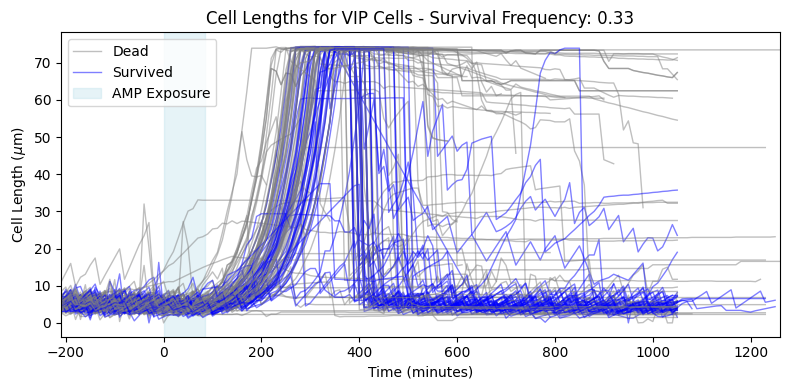

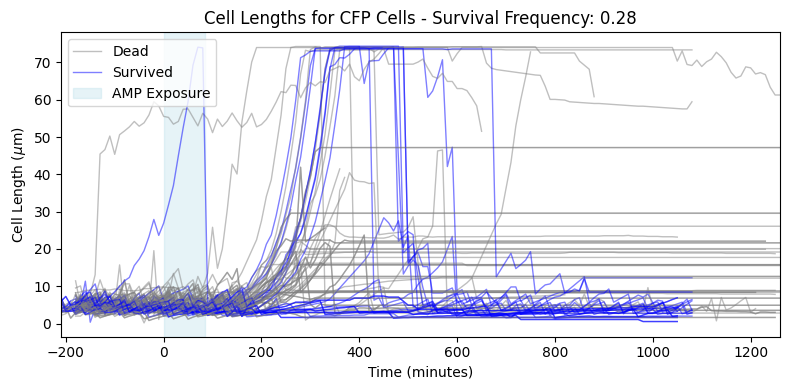

In [110]:
def plot_all_cells_in_single_plot(all_data, df, cell_type_filter=None, frames2min=5, pixel2um=1 / 11):
    """Plots cell lengths of all cells in a single plot with survival status, showing only 'Survived' and 'Dead' in the legend."""
    identifiers = get_identifiers_by_cell_type(all_data, df, cell_type_filter)

    # Initialize figure for plotting
    plt.figure(figsize=(8, 4))

    # Set global min and max frames for x-limits
    global_min_frame = float('inf')
    global_max_frame = float('-inf')

    # Initialize variables to track if we've added the Survived/Dead lines to the legend
    survived_plotted = False
    dead_plotted = False
    survived_count = 0
    total_cells = 0

    for identifier in identifiers:
        # Extract the correct position and trap from the identifier
        #position, trap = extract_position_and_trap(identifier)
        # Split the identifier
        parts = identifier.split('_')  # Expected format: 'EXP1_xy04_trap1'
        replicate = parts[0]  # First element -> 'EXP1'
        position = parts[1]   # Second element -> 'xy04'
        trap = parts[2]       # Third element -> 'trap1'

        if position is None or trap is None:
            print(f"Warning: Could not extract position or trap from identifier {identifier}, skipping...")
            continue

        # Filter based on cell type if specified
        if cell_type_filter is not None:
            cell_type = get_cell_type(df, position, trap)
            if cell_type_filter != cell_type:
                continue

        # Filter the DataFrame for the correct position and trap
        filtered_df = df[(df['Position'] == position) & (df['Trap'] == trap)]
        if filtered_df.empty:
            print(f"Warning: No data found for position {position} and trap {trap}, skipping...")
            continue

        # Retrieve tend_amp for this specific identifier
        tend_amp = filtered_df['tend_amp'].values[0]

        # Analyze division events for this identifier
        time_series_data = get_time_series_of_cell_lengths(all_data, df, identifier)
        if time_series_data[0]:  # Only analyze if there is data
            frames, cell_lengths, cell_divisions, survived = analyze_division_events(time_series_data, replicate, position, trap, df)

            total_cells += 1
            if survived:
                survived_count += 1

            # Set the survival status and line color based on survival
            line_color = 'blue' if survived else 'grey'
            label = None

            # Only add labels for "Survived" and "Dead" once
            if survived and not survived_plotted:
                label = "Survived"
                survived_plotted = True
            elif not survived and not dead_plotted:
                label = "Dead"
                dead_plotted = True

            # Shift frames by tini_amp and scale x and y data
            tini_amp = filtered_df['tini_amp'].values[0]
            scaled_x = (np.array(frames) - tini_amp) * frames2min
            scaled_y = np.array(cell_lengths) * pixel2um

            global_min_frame = min(global_min_frame, min(scaled_x))
            global_max_frame = max(global_max_frame, max(scaled_x))

            # Plot the time series for this cell
            plt.plot(scaled_x, scaled_y, color=line_color, linewidth=1, alpha=0.5, label=label)

    # Calculate survival frequency
    if total_cells > 0:
        survival_freq = survived_count / total_cells
    else:
        survival_freq = 0.0

    # Use the global x-limits for consistency
    plt.xlim([global_min_frame, global_max_frame])
    #xticks = np.arange(-240, 540 , 60)
    #plt.xticks(xticks)

    # Annotate the red box for cadmium exposure on the overall plot
    plt.axvspan(0, (tend_amp - tini_amp) * frames2min, color='#ADD8E6', alpha=0.3, label='AMP Exposure')

    # Add labels and legend
    plt.xlabel('Time (minutes)')
    plt.ylabel(r'Cell Length ($\mu$m)')
    plt.title(f'Cell Lengths for {cell_type_filter} Cells - Survival Frequency: {survival_freq:.2f}')



    # Only show "Survived" and "Dead" in the legend
    plt.legend(loc='upper left')

    # Display the plot
    plt.tight_layout()
    plt.show()
frames2min=10
# Plot all VIP cells in a single plot
plot_all_cells_in_single_plot(all_data, df, cell_type_filter="VIP")

# Plot all CFP cells in a single plot
plot_all_cells_in_single_plot(all_data, df, cell_type_filter="CFP")


In [89]:
import matplotlib.pyplot as plt
import numpy as np

def plot_trap_lengths(all_data, df, cell_type_filter=None, files_to_plot=None):
    colors = {1: 'blue', 2: '#ADD8E6'}
    cmap = plt.get_cmap("viridis")  # Use the viridis colormap
    x2frame = 10  # Define the constant for conversion

    plt.figure(figsize=(8, 4))

    # First plot all in light grey with transparency
    for file, data in all_data.items():
        trap_lengths = {}
        identifier = extract_file_identifier(file)  # Get the full identifier (e.g., 'EXP2_xy20_trap1')

        # Extract both position and trap
        position, trap = extract_position_and_trap(identifier)

        if position is None or trap is None:
            print(f"Warning: Could not extract position or trap from identifier {identifier}, skipping...")
            continue

        # Filter based on cell type if specified
        if cell_type_filter is not None:
            cell_type = get_cell_type(df, position, trap)
            if cell_type_filter != cell_type:
                continue

        # Check if the extracted position exists in the df['Position'] column
        filtered_df = df[df['Position'] == position]
        if filtered_df.empty:
            print(f"Warning: No tini_amp found for position {position}, skipping...")
            continue  # Skip this position if no matching rows are found

        # Retrieve the tini_amp and tend for this position from the DataFrame
        t_ini = filtered_df['tini_amp'].values[0]
        t_end = filtered_df['tend'].values[0]

        for trap_data in data:
            trap_id = trap_data['id']

            # Only consider traps with id=1 and id=2
            if trap_id not in colors:
                continue

            x_breakpoints = trap_data['x_breakpoints']
            y_breakpoints = trap_data['y_breakpoints']

            # Convert frames and adjust by tini_amp
            frames = [(x / x2frame) - t_ini for x in x_breakpoints]  # Adjusting by t_ini

            # Ensure both x_breakpoints and y_breakpoints have the same length
            min_length = min(len(x_breakpoints), len(y_breakpoints))
            x_breakpoints = x_breakpoints[:min_length]
            y_breakpoints = y_breakpoints[:min_length]

            # Filter out frames and breakpoints after t_end
            valid_indices = [i for i, frame in enumerate(frames) if frame <= (t_end - t_ini)]
            frames = [frames[i] for i in valid_indices]
            y_breakpoints = [y_breakpoints[i] for i in valid_indices]

            # Only process if there is data to process
            if frames and y_breakpoints:
                if trap_id not in trap_lengths:
                    trap_lengths[trap_id] = []
                trap_lengths[trap_id].append(y_breakpoints)

        if 1 in trap_lengths and 2 in trap_lengths:
            lengths_1 = trap_lengths[1][0]
            lengths_2 = trap_lengths[2][0]
            length_differences = [abs(l1 - l2) for l1, l2 in zip(lengths_1, lengths_2)]

            # Adjust transparency and width of the grey background lines
            plt.plot(frames[:len(length_differences)], length_differences, color='lightgrey', alpha=0.5, linewidth=2)

    # Then plot the selected files in color
    if files_to_plot is not None:
        num_files_to_plot = len(files_to_plot)
        color_map = cmap(np.linspace(0, 1, num_files_to_plot))

        for idx, (pkl_file, tif_file) in enumerate(files_to_plot):
            data = all_data[pkl_file]
            trap_lengths = {}
            identifier = extract_file_identifier(pkl_file)

            # Extract both position and trap
            position, trap = extract_position_and_trap(identifier)

            if position is None or trap is None:
                print(f"Warning: Could not extract position or trap from identifier {identifier}, skipping...")
                continue

            # Filter based on cell type if specified
            if cell_type_filter is not None:
                cell_type = get_cell_type(df, position, trap)
                if cell_type_filter != cell_type:
                    continue

            # Check if the extracted position exists in the df['Position'] column
            filtered_df = df[df['Position'] == position]
            if filtered_df.empty:
                print(f"Warning: No tini_amp found for position {position}, skipping...")
                continue  # Skip this position if no matching rows are found

            # Retrieve the tini_amp and tend for this position from the DataFrame
            t_ini = filtered_df['tini_amp'].values[0]
            t_end = filtered_df['tend'].values[0]

            for trap_data in data:
                trap_id = trap_data['id']

                # Only consider traps with id=1 and id=2
                if trap_id not in {1, 2}:
                    continue

                x_breakpoints = trap_data['x_breakpoints']
                y_breakpoints = trap_data['y_breakpoints']

                # Convert frames and adjust by tini_amp
                frames = [(x / x2frame) - t_ini for x in x_breakpoints]  # Adjusting by t_ini

                # Ensure both x_breakpoints and y_breakpoints have the same length
                min_length = min(len(x_breakpoints), len(y_breakpoints))
                x_breakpoints = x_breakpoints[:min_length]
                y_breakpoints = y_breakpoints[:min_length]

                # Filter out frames and breakpoints after t_end
                valid_indices = [i for i, frame in enumerate(frames) if frame <= (t_end - t_ini)]
                frames = [frames[i] for i in valid_indices]
                y_breakpoints = [y_breakpoints[i] for i in valid_indices]

                # Only process if there is data to process
                if frames and y_breakpoints:
                    if trap_id not in trap_lengths:
                        trap_lengths[trap_id] = []
                    trap_lengths[trap_id].append(y_breakpoints)

            if 1 in trap_lengths and 2 in trap_lengths:
                lengths_1 = trap_lengths[1][0]
                lengths_2 = trap_lengths[2][0]
                length_differences = [abs(l1 - l2) for l1, l2 in zip(lengths_1, lengths_2)]
                this_color = color_map[idx]

                # Increase linewidth and alpha for colored plots
                plt.plot(frames[:len(length_differences)], length_differences, label=extract_file_identifier(pkl_file), color=this_color, linewidth=3, alpha=0.8)

                # Analyze division events and plot them
                time_series_data = (frames[:len(length_differences)], length_differences)
                division_events = analyze_division_events(time_series_data)
                for i in range(len(frames)):
                    if division_events[2][i]:
                        plt.plot(frames[i], length_differences[i], 'o', color=this_color)

    plt.xlabel('Time (frames)', fontsize=16)
    plt.ylabel('Cell length (pixels)', fontsize=16)
    plt.show()

# Example usage
#plot_trap_lengths(all_data, df, cell_type_filter='CFP')
#plot_trap_lengths(all_data, df, cell_type_filter='VIP')


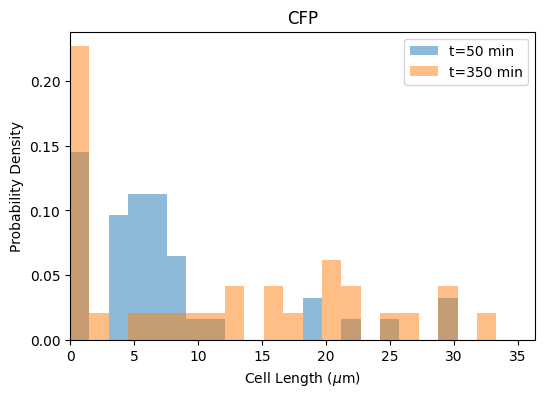

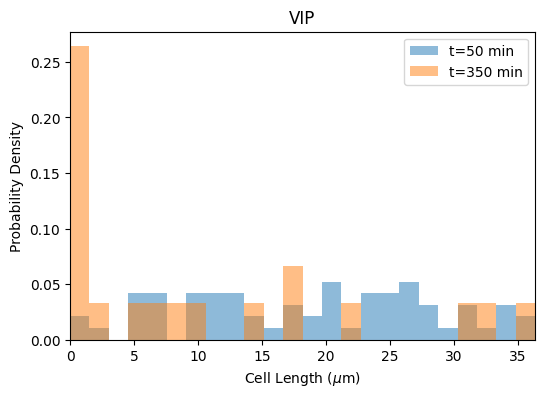

In [117]:
def plot_cell_length_distribution(all_data, df, time_frames, cell_type_filter=None, files_to_plot=None, max_cell_length=400, pixel2um=1 / 11, frames2min=5, num_bins=20):
    if files_to_plot is not None:
        filtered_data = {pkl_file: all_data[pkl_file] for pkl_file, _ in files_to_plot if pkl_file in all_data}
    else:
        filtered_data = all_data

    all_cell_lengths = {time_frame: [] for time_frame in time_frames}

    # Collect cell lengths
    for time_frame in time_frames:
        for file, data in filtered_data.items():
            identifier = extract_file_identifier(file)  # e.g., 'EXP3_xy10_trap6'
            position, trap = extract_position_and_trap(identifier)  # Extract 'xy10' and 'trap6'

            if position is None or trap is None:
                print(f"Warning: Could not extract position or trap from identifier {identifier}, skipping...")
                continue

            # Filter based on cell type if specified
            if cell_type_filter is not None:
                cell_type = get_cell_type(df, position, trap)  # Pass both position and trap to get_cell_type
                if cell_type_filter != cell_type:
                    continue

            for trap_data in data:
                trap_id = trap_data['id']

                # Only consider traps with id=1 and id=2
                if trap_id not in {1, 2}:
                    continue

                y_breakpoints = trap_data['y_breakpoints']

                # Only process if there is data to process
                if y_breakpoints:
                    # Ensure the time_frame is within the bounds of y_breakpoints
                    if time_frame < len(y_breakpoints):
                        cell_length = y_breakpoints[time_frame]
                        cell_length_um = cell_length * pixel2um  # Convert to micrometers
                        if 0 < cell_length_um <= max_cell_length:  # Filter out zero and overly large lengths
                            all_cell_lengths[time_frame].append(cell_length_um)

    # Adjust the bin scaling dynamically
    bin_edges = np.linspace(0, max_cell_length * pixel2um, num_bins + 1)

    plt.figure(figsize=(6, 4))

    for time_frame, lengths in all_cell_lengths.items():
        if lengths:
            # Convert time_frame to minutes for the label
            time_in_minutes = time_frame * frames2min
            plt.hist(lengths, bins=bin_edges, alpha=0.5, density=True, label=f't={time_in_minutes} min')

    plt.xlabel(r'Cell Length ($\mu$m)')
    plt.ylabel('Probability Density')
    plt.xlim([0, max_cell_length * pixel2um])  # Adjusted to match scaled values

    # Adjust title based on the cell type filter
    plot_title = cell_type_filter if cell_type_filter else 'All Cell Types'
    plt.title(plot_title)

    plt.legend()
    plt.show()

# Example usage
files_to_plot = matched_files  # Use the matched files dataset
time_frames = [10, 70]  # Specify the time frames to plot
plot_cell_length_distribution(all_data, df, time_frames, cell_type_filter='CFP', files_to_plot=files_to_plot, num_bins=24)
plot_cell_length_distribution(all_data, df, time_frames, cell_type_filter='VIP', files_to_plot=files_to_plot, num_bins=24)


In [158]:
from scipy.stats import ttest_ind, ks_2samp
import numpy as np

def compute_cell_length_stats(
    all_data, df, time_frames, cell_type_filter=None, files_to_plot=None,
    max_cell_length=400, pixel2um=1 / 11
):
    if files_to_plot is not None:
        filtered_data = {pkl_file: all_data[pkl_file] for pkl_file, _ in files_to_plot if pkl_file in all_data}
    else:
        filtered_data = all_data

    all_cell_lengths = {time_frame: [] for time_frame in time_frames}

    # Collect cell lengths
    for time_frame in time_frames:
        for file, data in filtered_data.items():
            identifier = extract_file_identifier(file)  # e.g., 'EXP3_xy10_trap6'
            position, trap = extract_position_and_trap(identifier)  # Extract 'xy10' and 'trap6'

            if position is None or trap is None:
                continue

            # Filter based on cell type if specified
            if cell_type_filter is not None:
                cell_type = get_cell_type(df, position, trap)
                if cell_type_filter != cell_type:
                    continue

            for trap_data in data:
                trap_id = trap_data['id']

                # Only consider traps with id=1 and id=2
                if trap_id not in {1, 2}:
                    continue

                y_breakpoints = trap_data['y_breakpoints']

                if y_breakpoints and time_frame < len(y_breakpoints):
                    cell_length = y_breakpoints[time_frame]
                    cell_length_um = cell_length * pixel2um  # Convert to micrometers
                    if 0 < cell_length_um <= max_cell_length:
                        all_cell_lengths[time_frame].append(cell_length_um)

    # Compute statistics
    stats_results = {}
    for time_frame in time_frames:
        lengths = all_cell_lengths[time_frame]
        if lengths:
            mean_length = np.mean(lengths)
            std_length = np.std(lengths)
            stats_results[time_frame] = (mean_length, std_length, lengths)
        else:
            stats_results[time_frame] = None

    return stats_results

def compare_cell_lengths(stats_1, stats_2):
    """
    Compare cell lengths between two conditions using t-test and KS test.
    """
    comparison_results = {}
    for time_frame in stats_1.keys():
        if stats_1[time_frame] is not None and stats_2[time_frame] is not None:
            _, _, lengths_1 = stats_1[time_frame]
            _, _, lengths_2 = stats_2[time_frame]

            # Perform statistical tests
            t_stat, p_ttest = ttest_ind(lengths_1, lengths_2, equal_var=False)
            ks_stat, p_ks = ks_2samp(lengths_1, lengths_2)

            comparison_results[time_frame] = {
                "t-test p-value": p_ttest,
                "KS test p-value": p_ks,
            }
        else:
            comparison_results[time_frame] = {
                "t-test p-value": None,
                "KS test p-value": None,
            }

    return comparison_results

# Example usage
files_to_plot = matched_files
time_frames = [10, 70]

stats_CFP_lengths = compute_cell_length_stats(all_data, df, time_frames, cell_type_filter='CFP', files_to_plot=files_to_plot)
stats_VIP_lengths = compute_cell_length_stats(all_data, df, time_frames, cell_type_filter='VIP', files_to_plot=files_to_plot)

#p_values_cfp = compare_cell_lengths(stats_CFP_lengths, stats_CFP_lengths)
#p_values_vip = compare_cell_lengths(stats_VIP_lengths, stats_VIP_lengths)
#p_values_cfp_vip = compare_cell_lengths(stats_CFP_lengths, stats_VIP_lengths)

# Print results in a readable format
print("\n### Statistical Comparison of Cell Lengths ###\n")

# CFP at Different Time Points
print(f"1. Comparison of CFP at Before / After IPTG removal:")
#print(f"   - Time {time_frames[0]} vs. Time {time_frames[1]}")
mean_1, std_1, _ = stats_CFP_lengths[time_frames[0]]
mean_2, std_2, _ = stats_CFP_lengths[time_frames[1]]
print(f"     - Mean ± SD: {mean_1/pixel2um:.2f} ± {std_1/pixel2um:.2f} µm vs. {mean_2/pixel2um:.2f} ± {std_2/pixel2um:.2f} µm")
ks_stat, p_ks = ks_2samp(stats_CFP_lengths[time_frames[0]][2], stats_CFP_lengths[time_frames[1]][2])
print(f"     - KS test p-value: {p_ks:.4f}")  # Replace MWU with KS

print("\n***\n")

# VIP at Different Time Points
print(f"2. Comparison of VIP Before / After IPTG removal:")
#print(f"   - Time {time_frames[0]} vs. Time {time_frames[1]}")
mean_1, std_1, _ = stats_VIP_lengths[time_frames[0]]
mean_2, std_2, _ = stats_VIP_lengths[time_frames[1]]
print(f"     - Mean ± SD: {mean_1/pixel2um:.2f} ± {std_1/pixel2um:.2f} µm vs. {mean_2/pixel2um:.2f} ± {std_2/pixel2um:.2f} µm")
ks_stat, p_ks = ks_2samp(stats_VIP_lengths[time_frames[0]][2], stats_VIP_lengths[time_frames[1]][2])
print(f"     - KS test p-value: {p_ks:.4f}")  # Replace MWU with KS

print("\n***\n")


# CFP vs. VIP after IPTG
print(f"3. Comparison of CFP vs. VIP after IPTG removal:")
#print(f"   - Time {time_frames[1]}")
mean_cfp, std_cfp, _ = stats_CFP_lengths[time_frames[1]]
mean_vip, std_vip, _ = stats_VIP_lengths[time_frames[1]]
print(f"     - Mean ± SD: {mean_cfp/pixel2um:.2f} ± {std_cfp/pixel2um:.2f} µm (CFP) vs. {mean_vip/pixel2um:.2f} ± {std_vip/pixel2um:.2f} µm (VIP)")
ks_stat, p_ks = ks_2samp(stats_CFP_lengths[time_frames[0]][2], stats_VIP_lengths[time_frames[1]][2])
print(f"     - KS test p-value: {p_ks:.4f}")  # Replace MWU with KS



### Statistical Comparison of Cell Lengths ###

1. Comparison of CFP at Before / After IPTG removal:
     - Mean ± SD: 4.40 ± 2.68 µm vs. 4.67 ± 2.45 µm
     - KS test p-value: 0.2127

***

2. Comparison of VIP Before / After IPTG removal:
     - Mean ± SD: 4.93 ± 2.12 µm vs. 5.73 ± 1.79 µm
     - KS test p-value: 0.0001

***

3. Comparison of CFP vs. VIP after IPTG removal:
     - Mean ± SD: 4.67 ± 2.45 µm (CFP) vs. 5.73 ± 1.79 µm (VIP)
     - KS test p-value: 0.0001


In [146]:
# Perform the KS test for additional validation
from scipy.stats import ks_2samp


print("\n### Statistical Comparison of Cell Lengths ###\n")

print(f"1. Comparison of VIP at Different Time Points:")
print(f"   - Time {time_frames[0]} vs. Time {time_frames[1]}")
print(f"     - t-test p-value: {p_values_vip[time_frames[0]]['t-test p-value']:.4f}")
print(f"     - KS test p-value: {p_ks:.4f}")  # Replace MWU with KS



### Statistical Comparison of Cell Lengths ###

1. Comparison of VIP at Different Time Points:
   - Time 10 vs. Time 70
     - t-test p-value: 1.0000
     - KS test p-value: 0.0001


In [92]:
def plot_heatmap_with_divisions(division_events, identifiers, df, filter_type='', frames2min=5, pixel2um=0.11):
    survived_events = []
    non_survived_events = []

    # Debug: Check initial division event count
    print(f"Total division events received: {len(division_events)}")

    for identifier, event in zip(identifiers, division_events):
        frames, cell_lengths, cell_divisions, survived = event

        # Extract metadata from identifier
        parts = identifier.split('_')  # Format: 'EXP1_xy04_trap1'
        replicate = parts[0]  # 'EXP1'
        position = parts[1]   # 'xy04'
        trap = parts[2]       # 'trap1'

        # Look up tini_amp in df
        filtered_df = df[
            (df['Replicate'] == replicate) &
            (df['Position'] == position) &
            (df['Trap'] == trap)
        ]

        if not filtered_df.empty:
            tini_amp = float(filtered_df['tini_amp'].values[0])  # Extract tini_amp from df
        else:
            print(f"Warning: No tini_amp found for {replicate}, {position}, {trap}. Skipping...")
            continue  # Skip this entry if tini_amp is missing

        # Use Google Sheets status instead of division events
        if survived:
            survived_events.append((frames, cell_lengths, cell_divisions, survived, tini_amp))
        else:
            non_survived_events.append((frames, cell_lengths, cell_divisions, survived, tini_amp))

    sorted_division_events = survived_events + non_survived_events

    # Handle empty list gracefully
    if not sorted_division_events:
        print("Warning: No valid division events found. Skipping heatmap generation.")
        return None

    num_cells = len(sorted_division_events)
    num_frames = max(len(frames) for frames, _, _, _, _ in sorted_division_events)

    heatmap_data = np.zeros((num_cells, num_frames))

    total_lengths = []
    total_divisions = []
    division_rates = []
    elongation_rates = []  # Store elongation rates
    time_between_divisions_all = []  # Store mean time between division events for each cell

    for i, (frames, cell_lengths, cell_divisions, survived, tini_amp) in enumerate(sorted_division_events):
        # Populate the heatmap with cell lengths, converting from pixels to micrometers
        for j, frame in enumerate(frames):
            if j < len(cell_lengths):
                heatmap_data[i, j] = min(cell_lengths[j] * pixel2um, 100 * pixel2um)  # Cap cell lengths in \(\mu\)m

        # Collect data for statistics

        lengths_before_tini = [cell_lengths[j] * pixel2um for j, frame in enumerate(frames) if frame < tini_amp]
        divisions_before_tini = [cell_divisions[j] for j, frame in enumerate(frames) if frame < tini_amp]
        time_elapsed = max([frame for frame in frames if frame < tini_amp], default=0)

        total_lengths.extend(lengths_before_tini)
        total_divisions.extend(divisions_before_tini)


        if time_elapsed > 0:  # Avoid division by zero
            division_rate = sum(divisions_before_tini) / (time_elapsed * frames2min)
            division_rates.append(division_rate)

        # Compute elongation rate
        if len(frames) > 1:  # Ensure at least two time points
            time_intervals = np.diff(frames) * frames2min  # Convert frame differences to minutes
            length_intervals = np.diff([l * pixel2um for l in cell_lengths])  # Convert length differences to \(\mu\)m
            rates = length_intervals / time_intervals  # Compute elongation rates
            elongation_rates.extend(rates)

        # Compute mean time between division events for this cell
        division_frames = [frame for frame, div in zip(frames, cell_divisions) if div]
        if len(division_frames) > 1:  # At least two division events are needed
            time_intervals = np.diff(division_frames) * frames2min  # Convert to minutes
            mean_time_between_divisions = np.mean(time_intervals)
            time_between_divisions_all.append(mean_time_between_divisions)

    # Compute overall statistics
    mean_length = np.mean(total_lengths) if total_lengths else np.nan
    std_length = np.std(total_lengths) if total_lengths else np.nan

    mean_divisions = np.mean(total_divisions) if total_divisions else np.nan
    std_divisions = np.std(total_divisions) if total_divisions else np.nan

    mean_division_rate = np.mean(division_rates) if division_rates else np.nan
    std_division_rate = np.std(division_rates) if division_rates else np.nan

    mean_elongation_rate = np.mean(elongation_rates) if elongation_rates else np.nan
    std_elongation_rate = np.std(elongation_rates) if elongation_rates else np.nan

    mean_time_between_divisions_all = np.mean(time_between_divisions_all) if time_between_divisions_all else np.nan
    std_time_between_divisions_all = np.std(time_between_divisions_all) if time_between_divisions_all else np.nan

    # Statistics on survival
    num_survived = len(survived_events)
    num_non_survived = len(non_survived_events)
    survival_percentage = (num_survived / num_cells * 100) if num_cells > 0 else 0.0


    # Convert critical timepoint to minutes
    #critical_timepoint_minutes = critical_timepoint * frames2min

    # Store statistics in a dictionary
    #statistics = {
    #    "filter_type": filter_type or "All Cells",
    #    "num_cells": num_cells,
    #    "num_survived": num_survived,
    #    "num_non_survived": num_non_survived,
    #    "survival_percentage": survival_percentage,
    #}
    # Store statistics in a dictionary
    statistics = {
        "filter_type": filter_type or "All Cells",
        #"critical_timepoint_frames": critical_timepoint,
        #"critical_timepoint_minutes": critical_timepoint_minutes,
        "num_cells": num_cells,
        "num_survived": num_survived,
        "num_non_survived": num_non_survived,
        "survival_percentage": survival_percentage,
        "mean_cell_length": (mean_length, std_length, "μm"),
        "mean_divisions": (mean_divisions, std_divisions, "count"),
        "mean_division_rate": (mean_division_rate, std_division_rate, "divisions/min"),
        "mean_elongation_rate": (mean_elongation_rate, std_elongation_rate, "μm/min"),
        "mean_time_between_divisions": (mean_time_between_divisions_all, std_time_between_divisions_all, "minutes"),
    }

    # Print statistics
    print(f"Statistics for {filter_type or 'All Cells'}:")
    for key, value in statistics.items():
        print(f"  {key}: {value:.4f}" if isinstance(value, float) else f"  {key}: {value}")

    # Plot the heatmap
    plt.figure(figsize=(8, 4))
    heatmap = sns.heatmap(heatmap_data, cmap='viridis', vmax=100 * pixel2um, cbar_kws={'label': r'Cell Length ($\mu$m)'}, yticklabels=False, xticklabels=False)
    plt.axhline(len(survived_events), color='white', linewidth=2)  # Horizontal line separating Alive/Dead

    plt.xlabel('Time (minutes)', fontsize=11)
    plt.title(filter_type or 'All Cells', fontsize=11)

    plt.tight_layout()
    plt.show()

    return statistics


Total division events received: 120
Statistics for VIP:
  filter_type: VIP
  num_cells: 105
  num_survived: 35
  num_non_survived: 70
  survival_percentage: 33.3333
  mean_cell_length: (np.float64(6.3680009363295875), np.float64(2.5747937232383467), 'μm')
  mean_divisions: (np.float64(0.2045880149812734), np.float64(0.4034002467863594), 'count')
  mean_division_rate: (np.float64(0.02126414027149321), np.float64(0.005183754100445217), 'divisions/min')
  mean_elongation_rate: (np.float64(0.01801458023554958), np.float64(0.6165213532206276), 'μm/min')
  mean_time_between_divisions: (np.float64(77.25488219526122), np.float64(29.11777597940027), 'minutes')


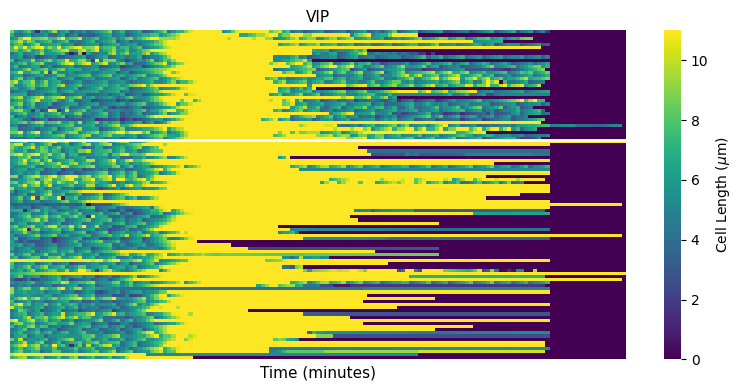

In [93]:
# Collect division events for the given cell type
cell_type_filter = "VIP"  # Specify the cell type you want to filter by

#this_tend_amp=60

identifiers = get_identifiers_by_cell_type(all_data, df, cell_type_filter)
division_events = []
time_between_divisions = []  # List to store mean time between division events for each cell

for identifier in identifiers:
    time_series_data = get_time_series_of_cell_lengths(all_data, df, identifier)

    # Extract the position and trap from the identifier
    parts = identifier.split('_')  # Expected format: 'EXP1_xy04_trap1'
    replicate = parts[0]  # First element -> 'EXP1'
    position = parts[1]   # Second element -> 'xy04'
    trap = parts[2]       # Third element -> 'trap1'
    #position, trap = extract_position_and_trap(identifier)

    # Get the tend_amp value for this identifier
    filtered_df = df[(df['Position'] == position) & (df['Trap'] == trap)]
    if not filtered_df.empty:
        #tend_amp = filtered_df['tend_amp'].values[0]  # Get the tend_amp value
        #tend_amp=this_tend_amp

        if time_series_data[0]:  # Only analyze if there is data
            # Pass both time_series_data and tend_amp to analyze_division_events
            frames, cell_lengths, cell_divisions, survived = analyze_division_events(time_series_data, replicate, position, trap, df)
            division_events.append((frames, cell_lengths, cell_divisions, survived))

            # Calculate time intervals between division events
            division_frames = [frame for frame, div in zip(frames, cell_divisions) if div]
            if len(division_frames) > 1:  # At least two division events are needed to compute intervals
                intervals = np.diff(division_frames)  # Time differences between consecutive division events
                mean_interval = np.mean(intervals)  # Average time between division events
                time_between_divisions.append(mean_interval)

    else:
        print(f"Warning: No tend_amp found for identifier {identifier}, skipping...")


# Plot the heatmap with division events
stats_VIP = plot_heatmap_with_divisions(division_events, identifiers, df, cell_type_filter)


53.0
Total division events received: 81
Statistics for CFP:
  filter_type: CFP
  num_cells: 78
  num_survived: 23
  num_non_survived: 55
  survival_percentage: 29.4872
  mean_cell_length: (np.float64(6.602713333333333), np.float64(5.886907102870082), 'μm')
  mean_divisions: (np.float64(0.18266666666666667), np.float64(0.3863930066079814), 'count')
  mean_division_rate: (np.float64(0.01897812971342383), np.float64(0.00558579853972955), 'divisions/min')
  mean_elongation_rate: (np.float64(0.011343929428959183), np.float64(0.32817346625831456), 'μm/min')
  mean_time_between_divisions: (np.float64(65.26070324870636), np.float64(23.240738068241825), 'minutes')


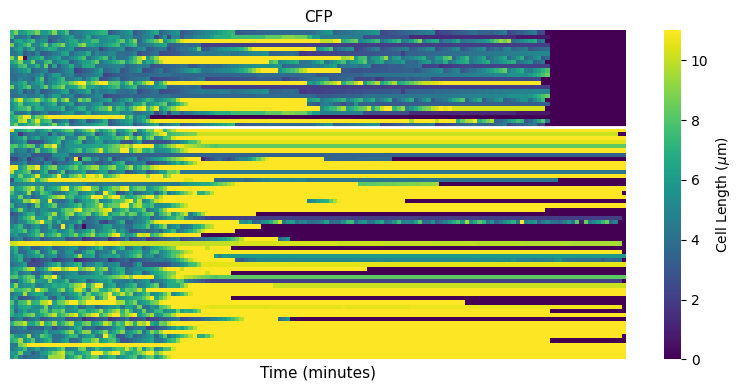

In [111]:
# Updated loop for collecting division events for the given cell type
cell_type_filter = "CFP"  # Specify the cell type you want to filter by

#this_tend_amp=60

identifiers = get_identifiers_by_cell_type(all_data, df, cell_type_filter)
division_events = []

for identifier in identifiers[1:]:
    # Get the time series data for the specific cell
    time_series_data = get_time_series_of_cell_lengths(all_data, df, identifier)

    # Retrieve the tend_amp value from the DataFrame
    #position, trap = extract_position_and_trap(identifier)
    parts = identifier.split('_')  # Expected format: 'EXP1_xy04_trap1'
    replicate = parts[0]  # First element -> 'EXP1'
    position = parts[1]   # Second element -> 'xy04'
    trap = parts[2]       # Third element -> 'trap1'
    filtered_df = df[(df['Position'] == position) & (df['Trap'] == trap)]

    if filtered_df.empty:
        print(f"Warning: No data found for position {position} and trap {trap}, skipping...")
        continue

    #tend_amp = filtered_df['tend_amp'].values[0]
    #tend_amp=this_tend_amp

    if time_series_data[0]:  # Only analyze if there is data
        division_events.append(analyze_division_events(time_series_data, replicate, position, trap, df))

# Plot the heatmap with division events
print(df['tend_amp'].values[1])
stats_CFP=plot_heatmap_with_divisions(division_events, identifiers, df, cell_type_filter)



In [95]:
print("VIP Stats:", stats_VIP)
print("CFP Stats:", stats_CFP)

import os
import pickle

def store_stats(stats_VIP, stats_CFP, data_path, expeID):
    """
    Stores the VIP and CFP statistics in a pickle file.

    Parameters:
    - stats_VIP: Dictionary of statistics for VIP cells.
    - stats_CFP: Dictionary of statistics for CFP cells.
    - data_path: Base directory where the file should be stored.
    - expeID: Experiment ID used to name the file.

    The output file will be stored as: data_path + expeID + '.pkl'
    """
    # Combine the statistics into a single dictionary
    combined_stats = {
        'stats_VIP': stats_VIP,
        'stats_CFP': stats_CFP
    }

    # Construct the full filename
    filename = os.path.join(data_path, expeID + '.pkl')

    # Save the dictionary to the pickle file
    with open(filename, 'wb') as f:
        pickle.dump(combined_stats, f)

    print(f"Stored statistics in {filename}")

store_stats(stats_VIP, stats_CFP, data_path, expeID)



VIP Stats: {'filter_type': 'VIP', 'num_cells': 105, 'num_survived': 35, 'num_non_survived': 70, 'survival_percentage': 33.33333333333333, 'mean_cell_length': (np.float64(6.3680009363295875), np.float64(2.5747937232383467), 'μm'), 'mean_divisions': (np.float64(0.2045880149812734), np.float64(0.4034002467863594), 'count'), 'mean_division_rate': (np.float64(0.02126414027149321), np.float64(0.005183754100445217), 'divisions/min'), 'mean_elongation_rate': (np.float64(0.01801458023554958), np.float64(0.6165213532206276), 'μm/min'), 'mean_time_between_divisions': (np.float64(77.25488219526122), np.float64(29.11777597940027), 'minutes')}
CFP Stats: {'filter_type': 'CFP', 'num_cells': 78, 'num_survived': 23, 'num_non_survived': 55, 'survival_percentage': 29.48717948717949, 'mean_cell_length': (np.float64(6.602713333333333), np.float64(5.886907102870082), 'μm'), 'mean_divisions': (np.float64(0.18266666666666667), np.float64(0.3863930066079814), 'count'), 'mean_division_rate': (np.float64(0.01897

VIP (time=tini_amp)
Survived Lengths Range: Min=0.66, Max=10.56
Non-Survived Lengths Range: Min=2.31, Max=21.67
Mann-Whitney U Test:
Statistic: 1344.5
p-value: 0.15548773733442248
Survived Median: 5.61 μm
Non-Survived Median: 6.05 μm


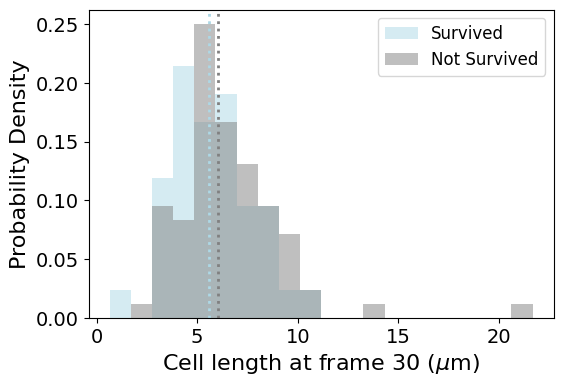

CFP (time=tini_amp)
Survived Lengths Range: Min=2.09, Max=28.16
Non-Survived Lengths Range: Min=0.99, Max=67.65
Mann-Whitney U Test:
Statistic: 462.5
p-value: 0.026036700513462213
Survived Median: 4.51 μm
Non-Survived Median: 5.83 μm


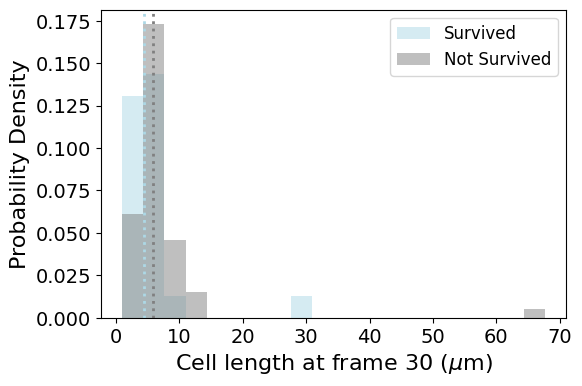

In [108]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import mannwhitneyu

def plot_survival_vs_non_survival_distributions(all_data, df, cell_type_filter=None, tcrit=60, pixel2um=0.11):
    identifiers = get_identifiers_by_cell_type(all_data, df, cell_type_filter)
    survived_lengths = []
    non_survived_lengths = []

    for identifier in identifiers:
        time_series_data = get_time_series_of_cell_lengths(all_data, df, identifier)
        if time_series_data[0]:  # Only analyze if there is data

            # Parse identifier (Expected format: 'EXP1_xy04_trap1')
            parts = identifier.split('_')
            replicate = parts[0]  # 'EXP1'
            position = parts[1]   # 'xy04'
            trap = parts[2]       # 'trap1'

            # Retrieve tini_amp from df for this specific identifier
            filtered_df = df[(df['Position'] == position) & (df['Trap'] == trap)]
            if not filtered_df.empty:
                tini_amp = filtered_df['tini_amp'].values[0]
            else:
                print(f"Warning: No tini_amp found for identifier {identifier}, skipping...")
                continue

            # Call analyze_division_events to get survived status from df
            frames, cell_lengths, cell_divisions, survived = analyze_division_events(time_series_data, replicate, position, trap, df)

            # Get the cell length at tini_amp
            frames_array = np.array(frames)  # Convert list to NumPy array

            if len(frames_array) > 0:
                index = np.argmin(np.abs(frames_array - tcrit))  # Get closest frame index
                length_at_tcrit = cell_lengths[index] * pixel2um  # Convert to micrometers

                if length_at_tcrit > 0:  # Filter out zero lengths
                    if survived:  # Use survived from analyze_division_events
                        survived_lengths.append(length_at_tcrit)
                    else:
                        non_survived_lengths.append(length_at_tcrit)

    # Print data range for debugging
    if survived_lengths and non_survived_lengths:
        print(f"Survived Lengths Range: Min={np.min(survived_lengths):.2f}, Max={np.max(survived_lengths):.2f}")
        print(f"Non-Survived Lengths Range: Min={np.min(non_survived_lengths):.2f}, Max={np.max(non_survived_lengths):.2f}")

    # Define dynamic bins based on data range
    all_lengths = survived_lengths + non_survived_lengths
    if all_lengths:
        min_length = np.min(all_lengths)
        max_length = np.max(all_lengths)
        num_bins = 20  # Define the desired number of bins
        bin_edges = np.linspace(min_length, max_length, num_bins + 1)
    else:
        print("No valid data to plot.")
        return

    # Perform the Mann-Whitney U test
    if survived_lengths and non_survived_lengths:
        stat, p_value = mannwhitneyu(survived_lengths, non_survived_lengths, alternative='two-sided')
        print(f'Mann-Whitney U Test:\nStatistic: {stat}\np-value: {p_value}')
    else:
        print('Not enough data for Mann-Whitney U Test.')

    # Plot the distributions
    plt.figure(figsize=(6, 4))

    if survived_lengths:
        plt.hist(survived_lengths, bins=bin_edges, alpha=0.5, density=True, label='Survived', color='#ADD8E6')
        survived_median = np.median(survived_lengths)
        plt.axvline(survived_median, color='#ADD8E6', linestyle='dotted', linewidth=2)
        print(f"Survived Median: {survived_median:.2f} μm")

    if non_survived_lengths:
        plt.hist(non_survived_lengths, bins=bin_edges, alpha=0.5, density=True, label='Not Survived', color='grey')
        non_survived_median = np.median(non_survived_lengths)
        plt.axvline(non_survived_median, color='grey', linestyle='dotted', linewidth=2)
        print(f"Non-Survived Median: {non_survived_median:.2f} μm")

    plt.xlabel(r'Cell length at frame %s ($\mu$m)'%tcrit, fontsize=16)
    plt.ylabel('Probability Density', fontsize=16)
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)
    plt.legend(loc='upper right', fontsize=12)
    plt.show()

tcrit=30
cell_type_filter = "VIP"  # Optionally specify the cell type
print(f"{cell_type_filter} (time=tini_amp)")
plot_survival_vs_non_survival_distributions(all_data, df, cell_type_filter,tcrit)

cell_type_filter = "CFP"  # Optionally specify the cell type
print(f"{cell_type_filter} (time=tini_amp)")
plot_survival_vs_non_survival_distributions(all_data, df, cell_type_filter,tcrit)


In [97]:
#!pip install statannot
!pip install statannotations

VIP - Mann-Whitney U Test:
Statistic: 1460.0
p-value: 0.43721193181630846
Critical time point: 50
VIP - Total cells: 133
VIP - Total cells analyzed after filtering: 120
VIP - Survived: 40
VIP - Not survived: 80
CFP - Mann-Whitney U Test:
Statistic: 518.0
p-value: 0.09849845646282165
Critical time point: 50
CFP - Total cells: 88
CFP - Total cells analyzed after filtering: 82
CFP - Survived: 23
CFP - Not survived: 59


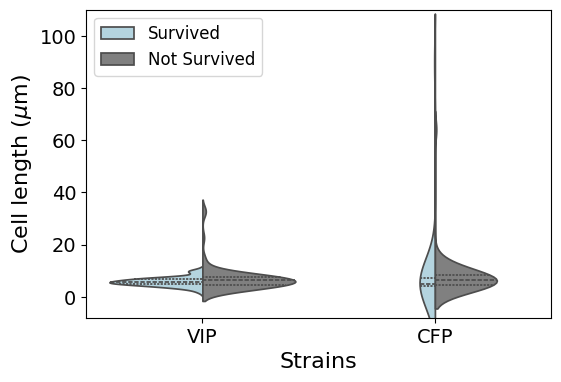

In [98]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import mannwhitneyu
import seaborn as sns
import pandas as pd

def plot_survival_vs_non_survival_distributions(all_data,  df, tcrit=60,max_cell_length_pixels=1000, pixel2um=0.11):
    cell_types = ["VIP", "CFP"]
    results = {}

    for cell_type_filter in cell_types:
        identifiers = get_identifiers_by_cell_type(all_data, df, cell_type_filter)
        survived_lengths = []
        non_survived_lengths = []

        for identifier in identifiers:
            time_series_data = get_time_series_of_cell_lengths(all_data, df, identifier)
            if time_series_data[0]:  # Only analyze if there is data

                # Parse identifier (Expected format: 'EXP1_xy04_trap1')
                parts = identifier.split('_')
                replicate = parts[0]  # 'EXP1'
                position = parts[1]   # 'xy04'
                trap = parts[2]       # 'trap1'

                # Retrieve tini_amp from df for this specific identifier
                filtered_df = df[(df['Position'] == position) & (df['Trap'] == trap)]
                if not filtered_df.empty:
                    tini_amp = filtered_df['tini_amp'].values[0]
                else:
                    print(f"Warning: No tini_amp found for identifier {identifier}, skipping...")
                    continue


                # Call analyze_division_events to get survived status from df
                frames, cell_lengths, cell_divisions, survived = analyze_division_events(time_series_data, replicate, position, trap, df)

                # Get the cell length at tini_amp
                frames_array = np.array(frames)  # Convert list to NumPy array

                if len(frames_array) > 0:
                    index = np.argmin(np.abs(frames_array - tcrit))  # Get closest frame index
                    length_at_tcrit = cell_lengths[index] * pixel2um  # Convert to micrometers

                    if length_at_tcrit > 0:  # Filter out zero lengths
                        if survived:  # Use survived from analyze_division_events
                            survived_lengths.append(length_at_tcrit)
                        else:
                            non_survived_lengths.append(length_at_tcrit)

        # Perform the Mann-Whitney U test
        if survived_lengths and non_survived_lengths:
            stat, p_value = mannwhitneyu(survived_lengths, non_survived_lengths, alternative='two-sided')
            results[cell_type_filter] = (survived_lengths, non_survived_lengths, stat, p_value)
            print(f'{cell_type_filter} - Mann-Whitney U Test:\nStatistic: {stat}\np-value: {p_value}')
        else:
            stat, p_value = None, None
            results[cell_type_filter] = (survived_lengths, non_survived_lengths, stat, p_value)
            print(f'{cell_type_filter} - Not enough data for Mann-Whitney U Test.')

        # Debugging step: Print filtered cell counts
        print("Critical time point:", tcrit)
        print(f"{cell_type_filter} - Total cells: {len(identifiers)}")
        print(f"{cell_type_filter} - Total cells analyzed after filtering: {len(survived_lengths) + len(non_survived_lengths)}")
        print(f"{cell_type_filter} - Survived: {len(survived_lengths)}")
        print(f"{cell_type_filter} - Not survived: {len(non_survived_lengths)}")

    # Prepare data for plotting
    data = []
    labels = []
    hue = []

    for cell_type_filter in cell_types:
        survived_lengths, non_survived_lengths, stat, p_value = results[cell_type_filter]

        if survived_lengths:
            data.extend(survived_lengths)
            labels.extend([cell_type_filter] * len(survived_lengths))
            hue.extend(['Survived'] * len(survived_lengths))

        if non_survived_lengths:
            data.extend(non_survived_lengths)
            labels.extend([cell_type_filter] * len(non_survived_lengths))
            hue.extend(['Not Survived'] * len(non_survived_lengths))

    plt.figure(figsize=(6, 4))
    sns.violinplot(x=labels, y=data, hue=hue, split=True, inner="quartile", palette={"Survived": "#ADD8E6", "Not Survived": "grey"})

    plt.xlabel('Strains', fontsize=16)
    plt.ylabel(r'Cell length ($\mu$m)', fontsize=16)  # Update the label to µm
    plt.xticks(fontsize=14)
    plt.legend(fontsize=12)
    plt.yticks(fontsize=14)
    plt.ylim([-8, max_cell_length_pixels * pixel2um])  # Scale y-axis to match converted lengths
    plt.show()

tcrit=50
plot_survival_vs_non_survival_distributions(all_data, df, tcrit)


VIP - Total cells: 133
VIP - Cells analyzed after filtering: 120
VIP - Survived: 40
VIP - Not Survived: 80


<ipython-input-102-5ab9cbf73582>:71: RuntimeWarning: invalid value encountered in cast
  bins = np.round(bins).astype(int)  # Round to whole units for cleaner labels


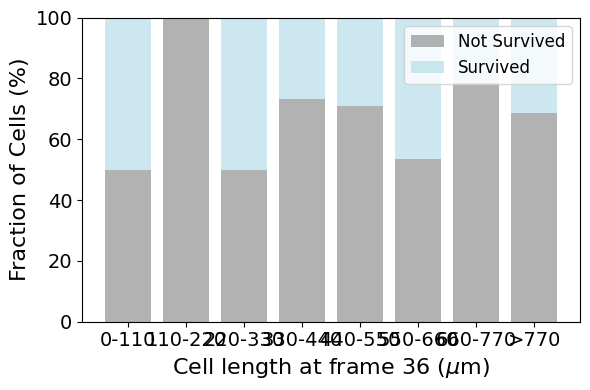

CFP - Total cells: 88
CFP - Cells analyzed after filtering: 82
CFP - Survived: 23
CFP - Not Survived: 59


<ipython-input-102-5ab9cbf73582>:71: RuntimeWarning: invalid value encountered in cast
  bins = np.round(bins).astype(int)  # Round to whole units for cleaner labels
<ipython-input-102-5ab9cbf73582>:88: RuntimeWarning: invalid value encountered in divide
  survived_fraction = 100 * survived_in_bins / total_in_bins
<ipython-input-102-5ab9cbf73582>:91: RuntimeWarning: invalid value encountered in divide
  non_survived_fraction = 100 * (total_in_bins - survived_in_bins) / total_in_bins


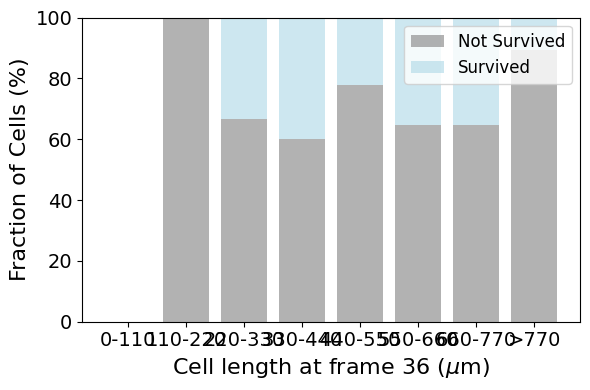

In [102]:
import matplotlib.pyplot as plt
import numpy as np

def plot_binned_length_vs_survival_fraction(
    all_data,
    df,
    tcrit=60,
    num_bins=5,
    max_length_for_bins_pixels=150,
    cell_type_filter=None,
    pixel2um=0.11,
    frames2min=5
):
    # Data containers for cell length and survival status
    cell_lengths_at_tcrit = []
    survival_status = []  # 1 = survived, 0 = not survived

    # Get identifiers based on the cell type filter
    identifiers = get_identifiers_by_cell_type(all_data, df, cell_type_filter)

    # Iterate over all division events corresponding to the filtered identifiers
    for identifier in identifiers:
        time_series_data = get_time_series_of_cell_lengths(all_data, df, identifier)
        if time_series_data[0]:  # Only analyze if there is data

            # Parse identifier (Expected format: 'EXP1_xy04_trap1')
            parts = identifier.split('_')
            replicate = parts[0]  # 'EXP1'
            position = parts[1]   # 'xy04'
            trap = parts[2]       # 'trap1'

            # Retrieve tini_amp from df for this specific identifier
            filtered_df = df[(df['Position'] == position) & (df['Trap'] == trap)]
            if not filtered_df.empty:
                tini_amp = filtered_df['tini_amp'].values[0]
            else:
                print(f"Warning: No tini_amp found for identifier {identifier}, skipping...")
                continue

            # Call analyze_division_events to get survival status from df
            frames, cell_lengths, cell_divisions, survived = analyze_division_events(time_series_data, replicate, position, trap, df)

            # Find the cell length at tini_amp
            frames_array = np.array(frames)  # Convert list to NumPy array

            if len(frames_array) > 0:
                index_at_tcrit = np.argmin(np.abs(frames_array - tcrit))  # Get closest frame index
                length_at_tcrit = cell_lengths[index_at_tcrit] * pixel2um  # Convert pixels to micrometers

                # Use survived from analyze_division_events instead of division-based logic
                status = 1 if survived else 0

                # Append the data to the lists
                cell_lengths_at_tcrit.append(length_at_tcrit)
                survival_status.append(status)

    # Debugging step: Print filtered cell counts
    print(f"{cell_type_filter} - Total cells: {len(identifiers)}")
    print(f"{cell_type_filter} - Cells analyzed after filtering: {len(cell_lengths_at_tcrit)}")
    print(f"{cell_type_filter} - Survived: {np.sum(survival_status)}")
    print(f"{cell_type_filter} - Not Survived: {len(survival_status) - np.sum(survival_status)}")

    # Convert to numpy arrays for easier manipulation
    cell_lengths_at_tini_amp = np.array(cell_lengths_at_tcrit)
    survival_status = np.array(survival_status)

    # Define the bins for cell lengths, rounded to whole units
    max_length_for_bins_um = max_length_for_bins_pixels * pixel2um  # Convert bin limit to micrometers
    bins = np.linspace(0, max_length_for_bins_um, num_bins)
    bins = np.append(bins, [np.inf])  # Add an infinite bin to capture lengths > max_length_for_bins
    bins = np.round(bins).astype(int)  # Round to whole units for cleaner labels
    bin_labels = [f'{bins[i]}-{bins[i+1]}' if i < len(bins) - 2 else f'>{bins[i]}' for i in range(len(bins) - 1)]

    # Initialize arrays to count survived and non-survived cells in each bin
    survived_in_bins = np.zeros(num_bins)
    total_in_bins = np.zeros(num_bins)

    # Bin the data based on cell lengths
    for i in range(num_bins):
        if i < num_bins - 1:
            in_bin = (cell_lengths_at_tini_amp >= bins[i]) & (cell_lengths_at_tini_amp < bins[i + 1])
        else:
            in_bin = cell_lengths_at_tini_amp >= bins[i]  # All lengths >= max_length_for_bins
        total_in_bins[i] = np.sum(in_bin)
        survived_in_bins[i] = np.sum(survival_status[in_bin])

    # Calculate the fraction of survived and non-survived cells in each bin
    survived_fraction = 100 * survived_in_bins / total_in_bins
    survived_fraction[total_in_bins == 0] = 0  # Set fraction to 0 where no cells are in the bin

    non_survived_fraction = 100 * (total_in_bins - survived_in_bins) / total_in_bins
    non_survived_fraction[total_in_bins == 0] = 0

    # Create the stacked bar plot
    plt.figure(figsize=(6, 4))
    plt.bar(bin_labels, non_survived_fraction, label='Not Survived', color='grey', alpha=0.6)
    plt.bar(bin_labels, survived_fraction, bottom=non_survived_fraction, label='Survived', color='#ADD8E6', alpha=0.6)

    # Labeling
    plt.xlabel(r'Cell length at frame %s ($\mu$m)' % (tcrit), fontsize=16)
    plt.ylabel('Fraction of Cells (%)', fontsize=16)
    plt.legend(loc='upper right', fontsize=12)
    plt.xticks(fontsize=14, rotation=0)
    plt.yticks(fontsize=14)

    # Set x-ticks without decimal points
    plt.xticks(ticks=range(len(bin_labels)), labels=bin_labels)

    # Show the plot
    plt.tight_layout()
    plt.show()

# Example usage
tcrit=36
plot_binned_length_vs_survival_fraction(all_data, df, tcrit, num_bins=8, max_length_for_bins_pixels=70, cell_type_filter='VIP', pixel2um=pixel2um, frames2min=frames2min)
plot_binned_length_vs_survival_fraction(all_data, df, tcrit, num_bins=8, max_length_for_bins_pixels=70, cell_type_filter='CFP', pixel2um=pixel2um, frames2min=frames2min)
